# New Section

In [27]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

In [29]:
p = Path().cwd()
q = p/"drive/MyDrive/Colab Notebooks/Brands"  # use p to create a path to the data 

target_dict={"Original":0,"Fake":1} # create dictionary mapping you data classes/labels to integer labels 
images = [] # create an empty list
labels = [] # create an empty list

for fldr in q.iterdir(): 
    current_label = fldr.name # get the name of the current label
    
    for subfldr in fldr.iterdir():
      current_label = subfldr.name
      
      for img in subfldr.iterdir():
        if img.is_file():  # check if the current item is a file
            img = load_img(img, color_mode = "grayscale") # load image as grayscale  
            img_array = img_to_array(img) # convert the image to an NumPy array 
            img_array_resized = smart_resize(img_array, (128, 128)) #resize the image to 128 by 128 
            images.append(img_array_resized) # add reshaped image to list of images 
            
            labels.append(target_dict[current_label]) # add label for this image to the list of labels


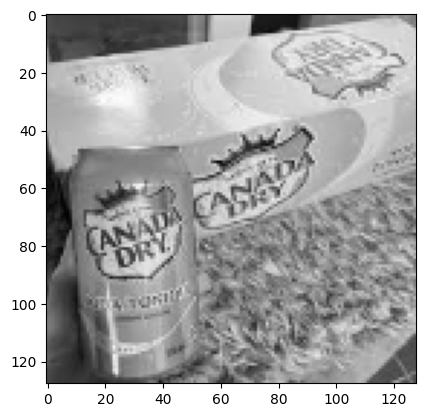

In [30]:
plt.imshow(images[70], cmap='gray')

In [31]:
print(labels[0])

1


In [32]:
len(images)

6000

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from sklearn.model_selection import train_test_split
import tensorflow as tf


In [34]:
# Making 80% split for training data
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.25, random_state=42)



In [35]:
# Converting values to numpy array
train_images = np.array(train_images)
test_images = np.array(test_images)
val_images = np.array(val_images)


In [36]:
# Scaling values to [0,1] interval
train_images = train_images / 255
test_images = test_images/ 255
val_images = val_images / 255


In [37]:
#shape of the image data arrays
print(train_images.shape)
print(test_images.shape)
print(val_images.shape)


(3600, 128, 128, 1)
(1200, 128, 128, 1)
(1200, 128, 128, 1)


In [38]:
# Converting labels to categorical
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
val_labels = to_categorical(val_labels)


In [39]:
model = Sequential()
initializer = tf.keras.initializers.HeUniform()
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializer,padding="same", input_shape=(128, 128, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializer,padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializer,padding="same"))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializer,padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer=initializer))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))

model.summary()
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

#Train the model for 20 epochs with a batch size of 25

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(val_images, val_labels), batch_size=25, verbose=1)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)

# Evaluate the model on validation data
validation_loss, validation_acc = model.evaluate(val_images, val_labels)

# Print the test and validation accuracy
print('Test accuracy:', test_acc)
print('Validation accuracy:', validation_acc)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 128)     1280      
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 128)     147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 64, 64, 128)       0         
                                                                 
 batch_normalization_6 (Batc  (None, 64, 64, 128)      512       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 128)      

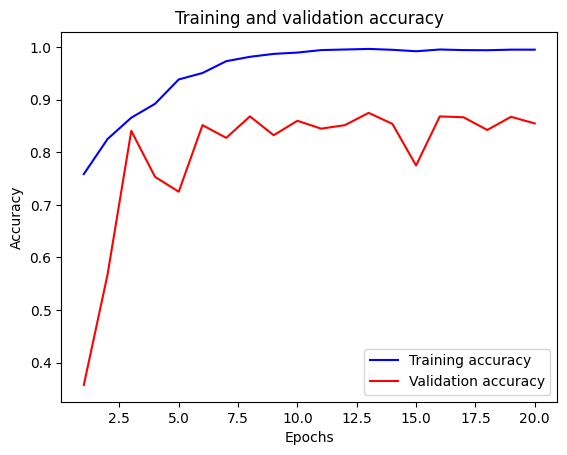

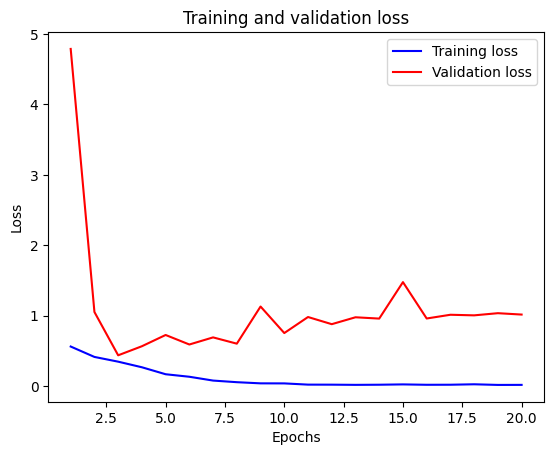

In [40]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

epochs_acc = range(1, len(accuracy) + 1)

#plot of  training and validation accuracy per epoch
plt.plot(epochs_acc, accuracy, "b", label="Training accuracy")
plt.plot(epochs_acc, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_loss = range(1, len(loss) + 1)

#plot of training and validation loss per epoch
plt.plot(epochs_loss, loss, "b", label="Training loss")
plt.plot(epochs_loss, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



